![lop](../../images/logo_diive1_128px.png)

<span style='font-size:32px; display:block;'>
<b>
    Format EddyPro _fluxnet_ output files for upload to FLUXNET database
</b>
</span>

---
**Notebook version**: `5` (24 Feb 2025)  
**Author**: Lukas Hörtnagl (holukas@ethz.ch)  

</br>

# **Background**

- Eddypro outputs `_fluxnet_` files
- The files cannot be directly uploaded to the FLUXNET database
- The class `FormatEddyProFluxnetFileForUpload` helps in formatting the files to comply with FLUXNET requirements for data sharing

More info:
- [FLUXNET Requirements for Data Sharing](https://www.swissfluxnet.ethz.ch/index.php/knowledge-base/fluxnet-requirements/)
- [Data submission - General Information](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/general-information)
- [FLUXNET Variables codes](http://www.europe-fluxdata.eu/home/guidelines/how-to-submit-data/variables-codes)

</br>

# **Imports**

In [1]:
import importlib.metadata
import warnings
from datetime import datetime

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from diive.core.plotting.heatmap_datetime import HeatmapDateTime  # For plotting heatmaps
from diive.core.plotting.timeseries import TimeSeries  # For simple (interactive) time series plotting
from diive.pkgs.formats.fluxnet import FormatEddyProFluxnetFileForUpload  # Class to format output files for upload

warnings.filterwarnings(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

version_diive = importlib.metadata.version("diive")
print(f"diive version: v{version_diive}")

diive version: v0.85.6


</br>

# **Docstring**

In [2]:
# help(FormatEddyProFluxnetFileForUpload)

</br>

# **Input and output folders**

In [3]:
SOURCE = r"F:\TMP\format_FXN\IN"  # This is the folder where datafiles are searched
OUTDIR = r"F:\TMP\format_FXN\OUT"  # Output yearly CSV to this folder

</br>

# **Format data**

## Initialize

In [4]:
fxn = FormatEddyProFluxnetFileForUpload(
    site='CH-FRU',
    use_co2=True,
    use_h2o=True,
    use_h=True,
    use_n2o=False,
    use_ch4=False,
    use_wind=True,
    use_meteo=True,
    sourcedir=SOURCE,
    outdir=OUTDIR,
    add_runid=True)


Initiated formatting for datafiles with the following settings:
    site: CH-FRU
    source folder: F:\TMP\format_FXN\IN
    output folder: F:\TMP\format_FXN\OUT
    add run ID: True

Searching for the following variables in the output file:
    FC
    FC_SSITC_TEST
    SC_SINGLE
    CO2
    LE
    LE_SSITC_TEST
    SLE_SINGLE
    H2O
    H
    H_SSITC_TEST
    SH_SINGLE
    USTAR
    WD
    WS
    FETCH_70
    FETCH_90
    FETCH_MAX
    SW_IN_1_1_1
    TA_1_1_1
    RH_1_1_1
    PA_1_1_1
    LW_IN_1_1_1
    PPFD_IN_1_1_1
    G_1_1_1
    NETRAD_1_1_1
    TS_1_1_1
    P_1_1_1
    SWC_1_1_1


## Search and merge `_fluxnet_` datafiles

In [5]:
fxn.mergefiles(limit_n_files=None)


Searching for EDDYPRO-FLUXNET-CSV-30MIN files with extension .csv andID _fluxnet_ in folder F:\TMP\format_FXN\IN ...
    Found 8 files:
   --> F:\TMP\format_FXN\IN\2020_4_IRGA_eddypro_CH-CHA_FR-20240730-112251_fluxnet_2024-07-30T121132_adv.csv
   --> F:\TMP\format_FXN\IN\2020_5_IRGA_eddypro_CH-CHA_FR-20240727-210053_fluxnet_2024-07-28T161420_adv.csv
   --> F:\TMP\format_FXN\IN\2021_1_IRGA_eddypro_CH-CHA_FR-20240727-005940_fluxnet_2024-07-27T135432_adv.csv
   --> F:\TMP\format_FXN\IN\2021_2_IRGA_eddypro_CH-CHA_FR-20240727-010348_fluxnet_2024-07-27T120109_adv.csv
   --> F:\TMP\format_FXN\IN\2022_1+2_IRGA_eddypro_CH-CHA_FR-20240726-181747_fluxnet_2024-07-27T080504_adv.csv
   --> F:\TMP\format_FXN\IN\2022_3_IRGA_eddypro_CH-CHA_FR-20240726-181749_fluxnet_2024-07-27T051830_adv.csv
   --> F:\TMP\format_FXN\IN\2023_1_IRGA_eddypro_CH-CHA_FR-20240726-181748_fluxnet_2024-07-27T162051_adv.csv
   --> F:\TMP\format_FXN\IN\2024_IRGA_eddypro_CH-CHA_FR-20250124-134851_fluxnet_2025-01-25T080153_adv.csv

## Merged dataset

In [6]:
fxn.merged_df

,AIR_MV,AIR_DENSITY,AIR_RHO_CP,AIR_CP,AOA_METHOD,AXES_ROTATION_METHOD,BOWEN,BURBA_METHOD,BADM_LOCATION_LAT,BADM_LOCATION_LONG,BADM_LOCATION_ELEV,BADM_HEIGHTC,BADM_INST_SAMPLING_INT,BADM_INST_AVERAGING_INT,BADM_INST_MODEL_SA,BADM_INST_HEIGHT_SA,BADM_INST_SA_WIND_FORMAT,BADM_INST_SA_GILL_ALIGN,BADM_SA_OFFSET_NORTH,BADM_INST_MODEL_GA_CO2,BADM_INSTPAIR_NORTHWARD_SEP_GA_CO2,BADM_INSTPAIR_EASTWARD_SEP_GA_CO2,BADM_INSTPAIR_HEIGHT_SEP_GA_CO2,BADM_INST_GA_CP_TUBE_LENGTH_GA_CO2,BADM_INST_GA_CP_TUBE_IN_DIAM_GA_CO2,...,W_NONE_MEAS_COV,W_T_SONIC_COV_IBROM,W_T_SONIC_COV_IBROM_N1626,W_T_SONIC_COV_IBROM_N0614,W_T_SONIC_COV_IBROM_N0277,W_T_SONIC_COV_IBROM_N0133,W_T_SONIC_COV_IBROM_N0065,W_T_SONIC_COV_IBROM_N0032,W_T_SONIC_COV_IBROM_N0016,W_T_SONIC_COV_IBROM_N0008,W_T_SONIC_COV_IBROM_N0004,W_NUM_SPIKES,WD_FILTER_NREX,W_SPIKE_NREX,W_ABSLIM_NREX,W_VM97_TEST,W_LGD,W_KID,W_ZCD,W_ITC,W_ITC_TEST,WBOOST_APPLIED,WPL_APPLIED,ZL,ZL_UNCORR
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-13 13:15:00,0.024500,1.17608,1191.22,1012.87,0.0,1.0,NaN,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,0.009841,0.009414,0.008728,0.007806,0.006711,0.005526,0.004362,0.003305,0.002339,0.001461,1.0,0.0,3.0,0.0,800000000.0,0.0,6.69523,25.0,4.0,1.0,0.0,1.0,-0.046304,-0.046063
2020-05-13 13:45:00,0.024514,1.17529,1190.60,1013.03,0.0,1.0,-0.831551,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,0.031091,0.030412,0.029349,0.027929,0.026279,0.024536,0.022833,0.021238,0.019704,0.018069,3.0,0.0,6.0,0.0,800000000.0,0.0,8.81971,67.0,1.0,1.0,0.0,1.0,-0.165843,-0.153564
2020-05-13 14:15:00,0.024598,1.17096,1186.70,1013.44,0.0,1.0,0.703969,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,0.047021,0.044587,0.040803,0.035924,0.030167,0.023785,0.017296,0.011473,0.006643,0.003149,0.0,0.0,0.0,0.0,800000000.0,0.0,8.10726,12.0,20.0,2.0,0.0,1.0,-0.056019,-0.060254
2020-05-13 14:45:00,0.024612,1.17067,1185.91,1013.02,0.0,1.0,0.321054,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,0.033122,0.031546,0.029115,0.026003,0.022434,0.018593,0.014762,0.011216,0.008028,0.005381,1.0,0.0,2.0,0.0,800000000.0,0.0,6.81548,7.0,18.0,2.0,0.0,1.0,-0.030037,-0.035236
2020-05-13 15:15:00,0.024610,1.17076,1185.96,1012.98,0.0,1.0,0.204171,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,14.0,31.0,1.0,NaN,NaN,...,NaN,0.018700,0.018003,0.016883,0.015391,0.013576,0.011408,0.008932,0.006383,0.003993,0.002192,2.0,0.0,3.0,0.0,800000000.0,0.0,7.03803,21.0,22.0,2.0,0.0,1.0,-0.025972,-0.033263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 22:45:00,0.022929,1.26068,1270.77,1008.00,0.0,1.0,1.505860,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,-6.7,34.0,0.0,NaN,NaN,...,NaN,0.005025,0.004886,0.004626,0.004241,0.003740,0.003140,0.002463,0.001807,0.001235,0.000763,3.0,0.0,4.0,0.0,800000001.0,0.0,6.98097,62.0,11.0,1.0,0.0,1.0,-0.064993,-0.067016
2024-12-31 23:15:00,0.022906,1.26203,1272.05,1007.94,0.0,1.0,1.700330,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,-6.7,34.0,0.0,NaN,NaN,...,NaN,0.006916,0.006784,0.006529,0.006149,0.005626,0.004918,0.004044,0.003103,0.002167,0.001332,0.0,0.0,0.0,0.0,800000000.0,0.0,7.81927,98.0,20.0,2.0,0.0,1.0,-0.062181,-0.063931
2024-12-31 23:45:00,0.022888,1.26306,1273.02,1007.89,0.0,1.0,1.748210,0.0,47.2102,8.41064,393.0,0.5,20.0,30.0,NaN,2.41,NaN,NaN,7.0,NaN,-6.7,34.0,0.0,NaN,NaN,...,NaN,0.008246,0.008040,0.007664,0.007157,0.006541,0.005775,0.004807,0.003698,0.002606,0.001704,0.0,0.0,0.0,0.0,800000000.0,0.0,7.65207,56.0,25.0,2.0,0.0,1.0,-0.047302,-0.048536


## Test for signal strength / AGC

<div class="alert alert-block alert-info">
    <b>Skip this part if not applicable for your data.</b>
</div>

<div class="alert alert-block alert-danger">
    <b>Do not use for H (sensible heat flux).</b> This test is only relevant for fluxes where the concentration was measured by a gas analyzer, e.g. FC, FH2O, LE, ET, N2O, CH4, etc ... 
</div>

In [7]:
FLUXCOLS = ['FC', 'LE']  # Give flux columns as list
SIGNAL_STRENGTH_COL = 'CUSTOM_AGC_MEAN'  # Name of the column storing the signal strength, typically 'CUSTOM_AGC_MEAN' for LI-7500, 'CUSTOM_SIGNAL_STRENGTH_IRGA72_MEAN' for LI-7200, or something similar
SIGNAL_STRENGTH_THRESHOLD = 90  # Signal strength threshold, flux values where threshold is exceeded are flagged as rejected
SIGNAL_STRENGTH_METHOD = 'discard above'  # 'discard above' flags fluxes where signal strength > threshold, 'discard below' where signal strength < threshold

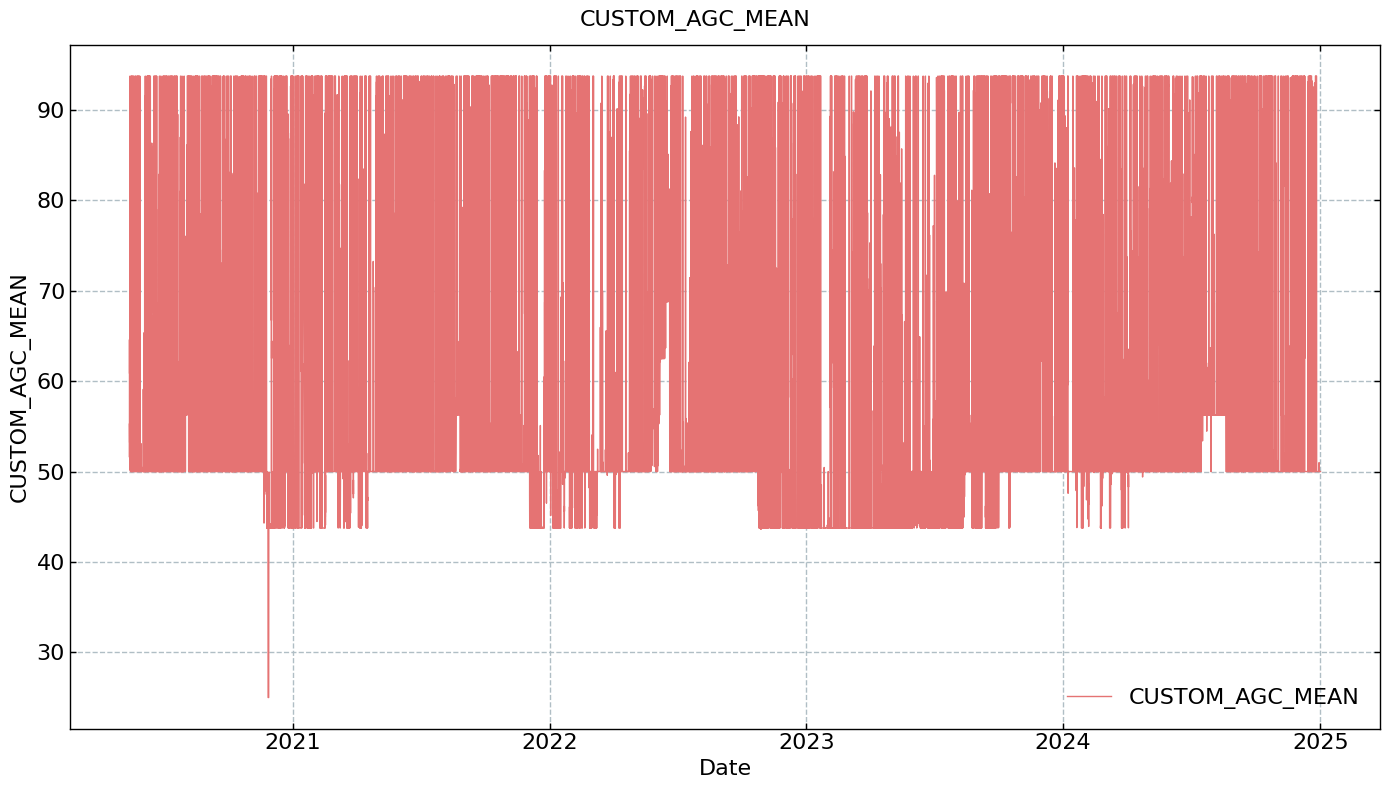

In [8]:
# TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot_interactive()
TimeSeries(series=fxn.merged_df[SIGNAL_STRENGTH_COL]).plot()

In [9]:
for f in FLUXCOLS:
    fxn.remove_low_signal_data(fluxcol=f,
                               signal_strength_col=SIGNAL_STRENGTH_COL,
                               method=SIGNAL_STRENGTH_METHOD,
                               threshold=SIGNAL_STRENGTH_THRESHOLD)



Removing FC flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_FC_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0 (good values) where CUSTOM_AGC_MEAN <= 90, flag 2 (bad values) where CUSTOM_AGC_MEAN > 90 ...
CUSTOM_AGC_MEAN rejected 12145 values of FC, all rejected value were removed from the dataset.

Available values of FC before removing low signal fluxes: 73534
Available values of FC after removing low signal fluxes: 65781

Removing all newly generated columns relating to quality check (not needed for FLUXNET), restoring original set of variables ...


Removing LE flux values where signal strength / AGC is not sufficient:

Performing signal strength / AGC quality check ...

SIGNAL STRENGTH TEST: Generating new flag variable FLAG_L2_LE_SIGNAL_STRENGTH_TEST, newly calculated from output variable CUSTOM_AGC_MEAN, with flag 0

## Remove problematic time periods
               
Use `REMOVE_DATES` to specify the time period(s) for `VAR` that are removed from the dataset.

For example:

```python
REMOVE_DATES = ['2022-06-30 23:58:30',
                ['2022-06-05 00:00:30', '2022-06-07 14:30:00']]
```
will remove the record for `2022-06-30 23:58:30` and all records between
`2022-06-05 00:00:30` (inclusive) and `2022-06-07 14:30:00` (inclusive).

This also works when providing only the date, e.g.
```python
REMOVE_DATES = [['2006-05-01', '2006-07-18']] 
```
will remove all data points between `2006-05-01` (inclusive) and `2006-07-18` (inclusive).

<div class="alert alert-block alert-info">
    <b>Skip this part if not applicable for your data.</b>
</div>

### Plot affected variables

In [10]:
# VAR = ['FC']
# for v in VAR:
#     # TimeSeries(series=fxn.merged_df[v]).plot_interactive()
#     TimeSeries(series=fxn.merged_df[v]).plot()

In [11]:
# # These variables are erroneous during the defined time period
# VAR = ['FC', 'LE']  
# REMOVE_DATES = [    
#     ['2024-08-17', '2024-08-18'],
#     # ['2017-06-12 18:00', '2017-06-16 11:00']
# ]

In [12]:
# for v in VAR:
#     fxn.remove_erroneous_data(var=v,
#                               remove_dates=REMOVE_DATES,
#                               showplot=True)

## Format data for FLUXNET

In [13]:
fxn.apply_fluxnet_format()


Assembling subset of variables ...
  > Removing empty variables ...
  > Collecting available data ...
      searching for FC ... found FC OK
      searching for FC_SSITC_TEST ... found FC_SSITC_TEST OK
      searching for SC_SINGLE ... found SC_SINGLE OK
      searching for CO2 ... found CO2 OK
      searching for LE ... found LE OK
      searching for LE_SSITC_TEST ... found LE_SSITC_TEST OK
      searching for SLE_SINGLE ... found SLE_SINGLE OK
      searching for H2O ... found H2O OK
      searching for H ... found H OK
      searching for H_SSITC_TEST ... found H_SSITC_TEST OK
      searching for SH_SINGLE ... found SH_SINGLE OK
      searching for USTAR ... found USTAR OK
      searching for WD ... found WD OK
      searching for WS ... found WS OK
      searching for FETCH_70 ... found FETCH_70 OK
      searching for FETCH_90 ... found FETCH_90 OK
      searching for FETCH_MAX ... found FETCH_MAX OK
      searching for SW_IN_1_1_1 ... found SW_IN_1_1_1 OK
      searching for TA_

## Save yearly `CSV` files

In [14]:
fxn.export_yearly_files()


Saving yearly CSV files ...
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2020_fluxes_meteo_20250225.csv.
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2021_fluxes_meteo_20250225.csv.
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2022_fluxes_meteo_20250225.csv.
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2023_fluxes_meteo_20250225.csv.
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2024_fluxes_meteo_20250225.csv.
    --> Saved file F:\TMP\format_FXN\OUT\CH-FRU_2025_fluxes_meteo_20250225.csv.


</br>

# **Check FLUXNET data**

- The merged file data from all files can be directly returned with `.get_data()`
- Note that the dataframe below does not show exactly how the data look like in the formatted data files, but how data were stored in `diive`, hence the timestamp index `TIMESTAMP_MIDDLE`
- The yearly files do not contain the timestamp index `TIMESTAMP_MIDDLE`

## Dataframe that was used to generate yearly files

In [15]:
data_fluxnet = fxn.get_data()
data_fluxnet

,TIMESTAMP_START,TIMESTAMP_END,FC_1_1_1,FC_SSITC_TEST_1_1_1,SC_1_1_1,CO2_1_1_1,LE_1_1_1,LE_SSITC_TEST_1_1_1,SLE_1_1_1,H2O_1_1_1,H_1_1_1,H_SSITC_TEST_1_1_1,SH_1_1_1,USTAR_1_1_1,WD_1_1_1,WS_1_1_1,FETCH_70_1_1_1,FETCH_90_1_1_1,FETCH_MAX_1_1_1,SW_IN_1_1_1,TA_1_1_1,RH_1_1_1,PA_1_1_1,LW_IN_1_1_1,PPFD_IN_1_1_1
TIMESTAMP_MIDDLE,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-13 13:15:00,202005131300,202005131330,18.238100,2.0,-9999.000000,506.190,-9999.00000,-9999.0,-9999.000000,-9999.00000,15.23700,0.0,-9999.000000,0.198067,345.661,2.20417,-9999.0000,-9999.0000,-9999.0000,128.501,11.39700,98.6687,-9999.0000,369.660,284.284
2020-05-13 13:45:00,202005131330,202005131400,19.520600,2.0,-1.794520,473.469,-54.05140,2.0,0.661622,13.99740,44.94650,1.0,0.259835,0.185657,338.817,1.87464,-9999.0000,-9999.0000,-9999.0000,171.778,11.56000,99.5350,-9999.0000,378.892,357.484
2020-05-13 14:15:00,202005131400,202005131430,-1.978560,2.0,-2.281650,431.723,72.97890,1.0,1.722110,14.70520,51.37490,0.0,1.552310,0.278716,332.653,2.49002,50.5504,75.7337,27.6486,330.886,12.53700,98.0478,-9999.0000,377.880,657.739
2020-05-13 14:45:00,202005131430,202005131500,-14.269900,0.0,-2.005670,395.007,97.93440,0.0,-1.843510,13.94700,31.44220,0.0,0.242933,0.291292,347.539,2.59345,49.5930,74.2993,27.1249,240.016,12.69000,92.0638,-9999.0000,359.818,481.196
2020-05-13 15:15:00,202005131500,202005131530,-9.210930,0.0,-0.084601,393.459,88.82480,0.0,-0.173629,13.87560,18.13550,0.0,-0.025406,0.254517,338.926,2.20947,51.0002,76.4076,27.8946,171.813,12.67400,91.6886,-9999.0000,359.698,364.466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 22:45:00,202412312230,202412312300,0.964472,0.0,0.082495,463.951,4.60506,0.0,0.018642,5.31868,6.93460,0.0,0.025918,0.135574,183.899,1.72088,-9999.0000,-9999.0000,-9999.0000,0.000,-2.08944,99.9980,98.2851,302.094,0.000
2024-12-31 23:15:00,202412312300,202412312330,1.158030,0.0,0.214644,467.623,5.01648,0.0,-0.274581,5.21464,8.52968,0.0,-0.453573,0.147416,198.289,1.47190,-9999.0000,-9999.0000,-9999.0000,0.000,-2.35576,99.9980,98.2897,302.217,0.000
2024-12-31 23:45:00,202412312330,202501010000,1.775690,1.0,-0.048053,466.801,6.53174,0.0,-0.225461,5.12931,11.41890,0.0,-0.380222,0.177982,200.110,1.75480,-9999.0000,-9999.0000,-9999.0000,0.000,-2.57884,99.9980,98.2857,298.393,0.000


In [16]:
data_fluxnet.columns.to_list()

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'FC_1_1_1',
 'FC_SSITC_TEST_1_1_1',
 'SC_1_1_1',
 'CO2_1_1_1',
 'LE_1_1_1',
 'LE_SSITC_TEST_1_1_1',
 'SLE_1_1_1',
 'H2O_1_1_1',
 'H_1_1_1',
 'H_SSITC_TEST_1_1_1',
 'SH_1_1_1',
 'USTAR_1_1_1',
 'WD_1_1_1',
 'WS_1_1_1',
 'FETCH_70_1_1_1',
 'FETCH_90_1_1_1',
 'FETCH_MAX_1_1_1',
 'SW_IN_1_1_1',
 'TA_1_1_1',
 'RH_1_1_1',
 'PA_1_1_1',
 'LW_IN_1_1_1',
 'PPFD_IN_1_1_1']

## Overview of variables and some stats

In [17]:
# print(*data_fluxnet.columns, sep = "\n")
data_fluxnet.describe().T

,count,mean,std,min,25%,50%,75%,max
FC_1_1_1,81288.0,-1909.519459,3927.802481,-9999.0,-21.052925,-3.977390,2.376202,1795.34000
FC_SSITC_TEST_1_1_1,81288.0,-953.095561,2937.470286,-9999.0,0.000000,1.000000,1.000000,2.00000
SC_1_1_1,81288.0,-1205.140123,3255.391051,-9999.0,-0.933723,-0.053511,0.196309,25.91330
CO2_1_1_1,81288.0,-525.926231,3077.468074,-9999.0,407.314500,434.458000,487.976250,893.64100
LE_1_1_1,81288.0,-2189.673110,4187.980424,-9999.0,-35.021100,4.578640,58.185025,6528.48000
LE_SSITC_TEST_1_1_1,81288.0,-1906.416814,3928.568083,-9999.0,0.000000,0.000000,1.000000,2.00000
SLE_1_1_1,81288.0,-79.674732,2012.232778,-46344.1,-0.683395,-0.014664,0.611076,45386.20000
H2O_1_1_1,81288.0,-1896.689167,3933.293320,-9999.0,5.777100,10.016300,15.781200,34.13860
H_1_1_1,81288.0,-41.314131,704.419761,-9999.0,-5.167587,0.232955,13.551500,3114.20000
H_SSITC_TEST_1_1_1,81288.0,-48.476799,699.740113,-9999.0,0.000000,1.000000,1.000000,2.00000


## Plot some key variables
- Keep in mind that FLUXNET requires missing values as `-9999` when looking at the plots

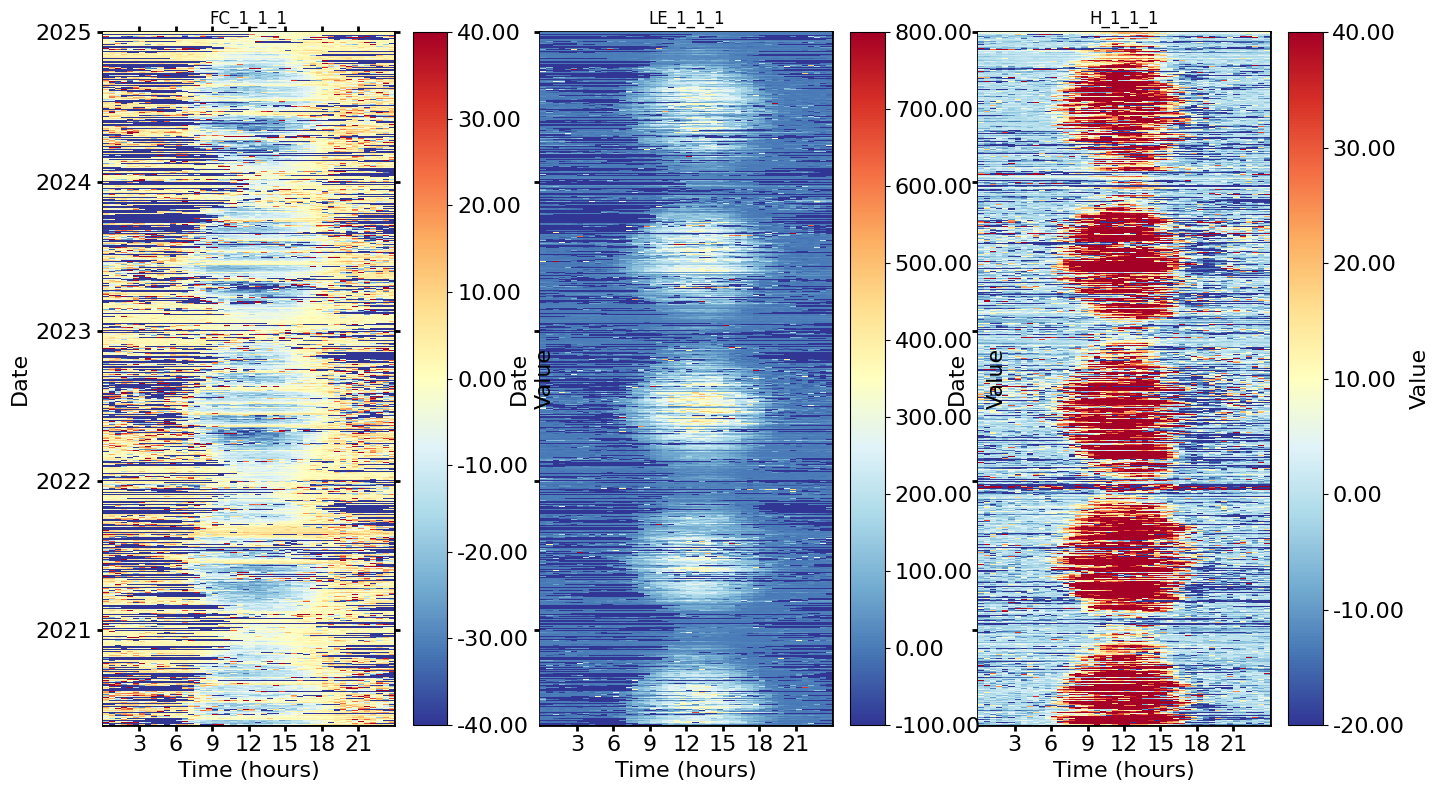

In [18]:
fig = plt.figure(facecolor='white', figsize=(16, 9))
gs = gridspec.GridSpec(1, 3)  # rows, cols
ax_fc = fig.add_subplot(gs[0, 0])
ax_le = fig.add_subplot(gs[0, 1])
ax_ta = fig.add_subplot(gs[0, 2])
HeatmapDateTime(ax=ax_fc, series=data_fluxnet['FC_1_1_1'], vmin=-40, vmax=40).plot()
HeatmapDateTime(ax=ax_le, series=data_fluxnet['LE_1_1_1'], vmin=-100, vmax=800).plot()
HeatmapDateTime(ax=ax_ta, series=data_fluxnet['H_1_1_1'], vmin=-20, vmax=40).plot()
ax_fc.set_title("FC_1_1_1", color='black')
ax_le.set_title("LE_1_1_1", color='black')
ax_ta.set_title("H_1_1_1", color='black')
ax_le.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)
ax_ta.tick_params(left=True, right=False, top=False, bottom=True,
                  labelleft=False, labelright=False, labeltop=False, labelbottom=True)

## Plot all variables

C:\Users\nopan\AppData\Local\Temp\ipykernel_27688\1592564276.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(facecolor='white', figsize=(4, 8))


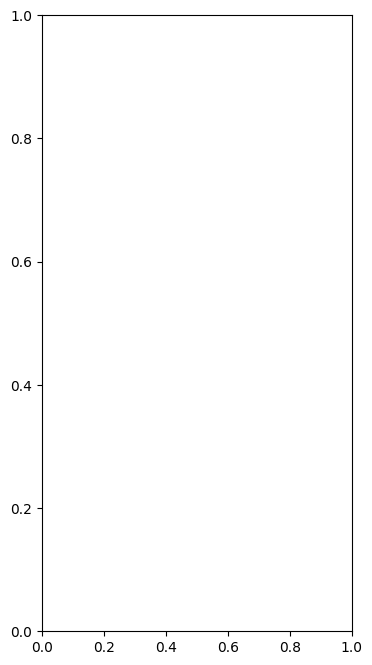

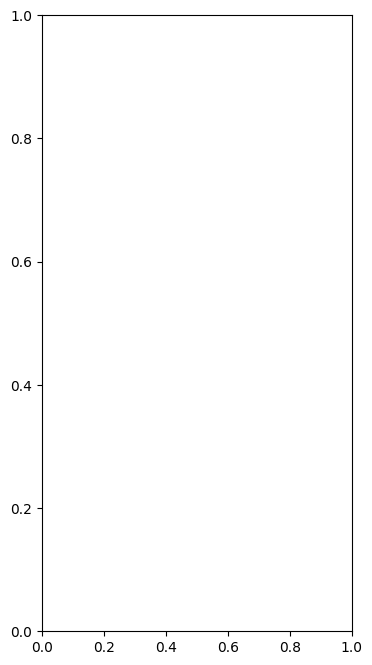

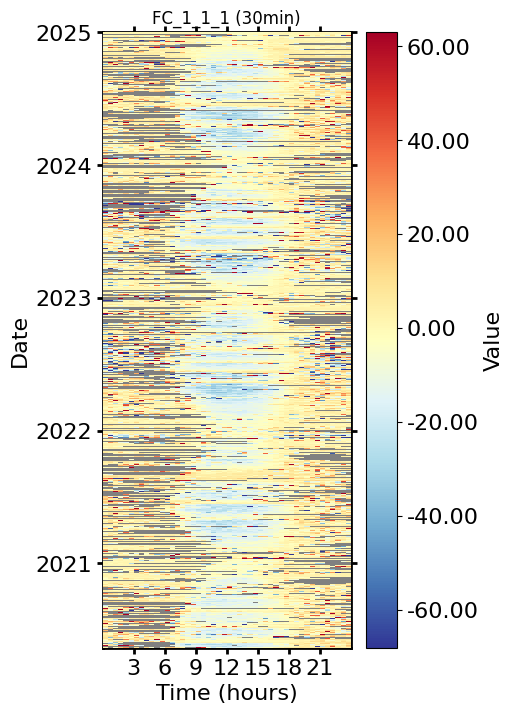

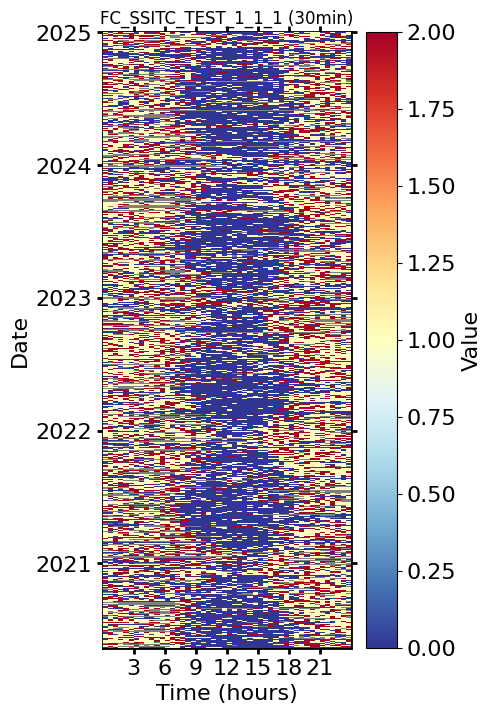

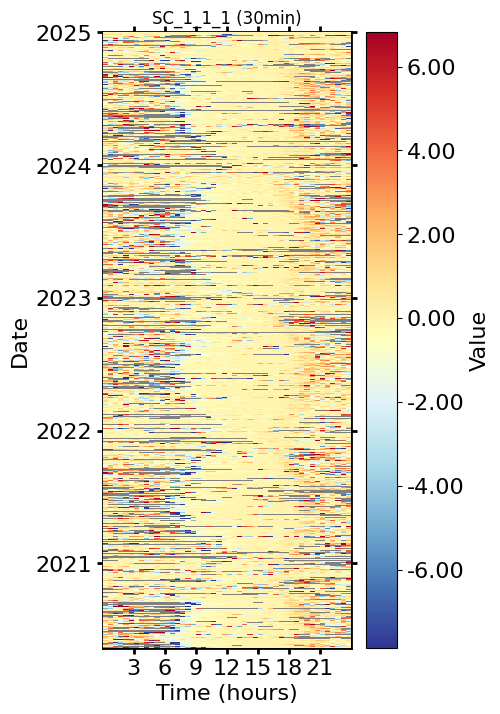

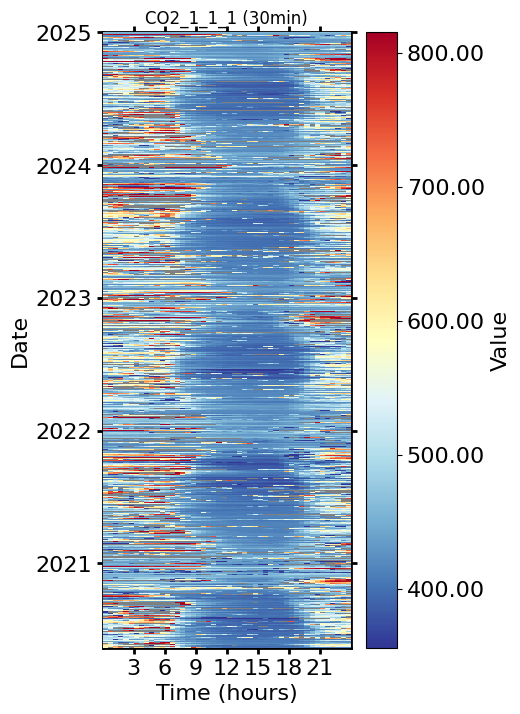

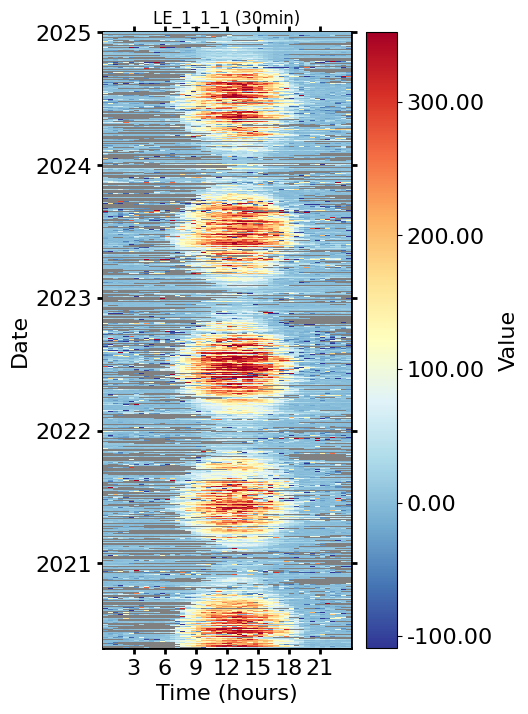

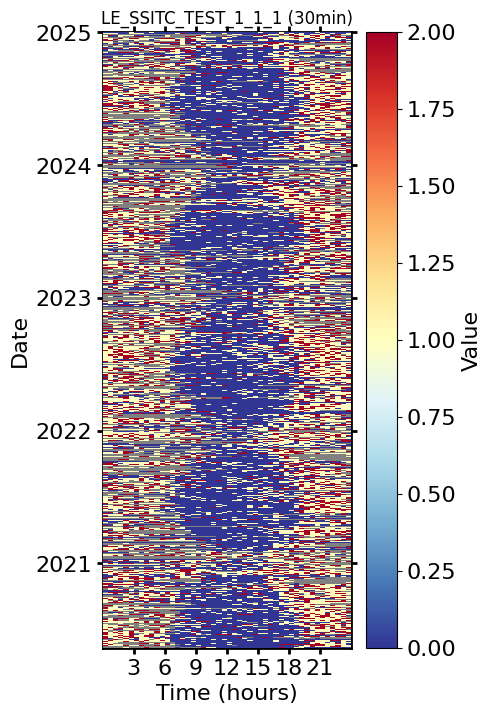

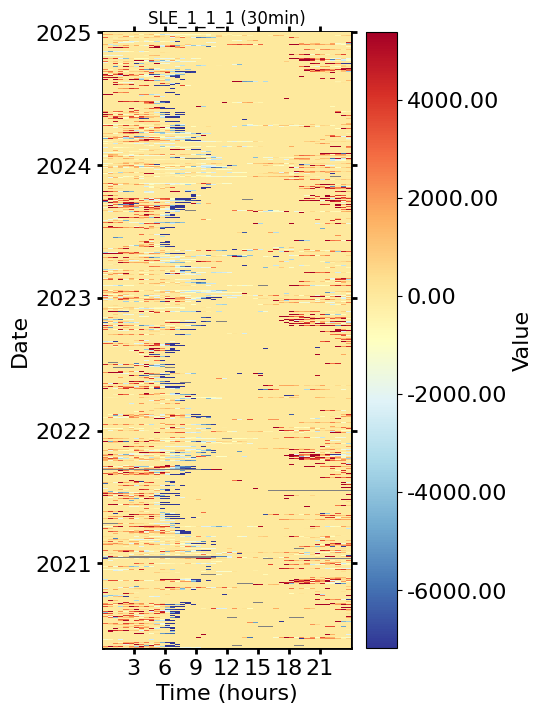

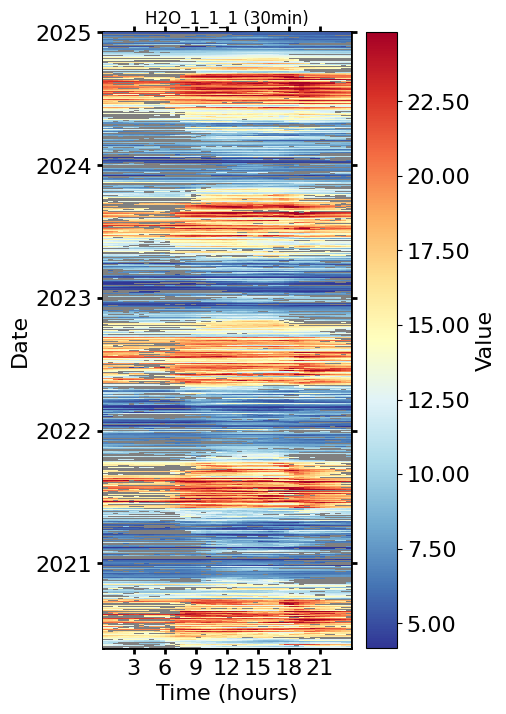

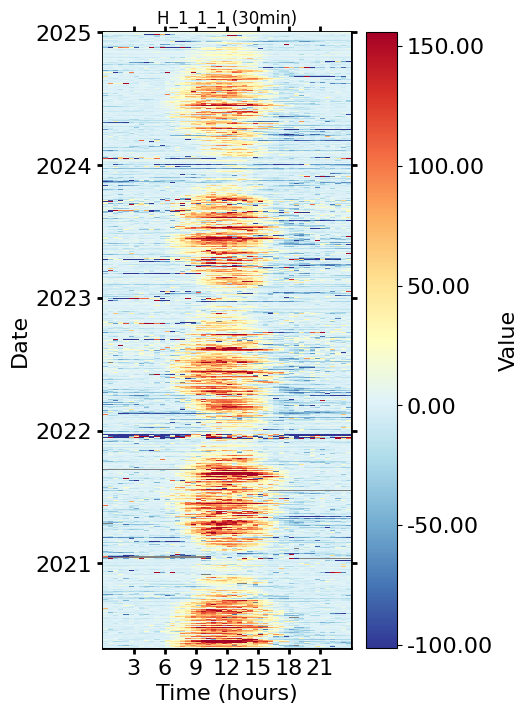

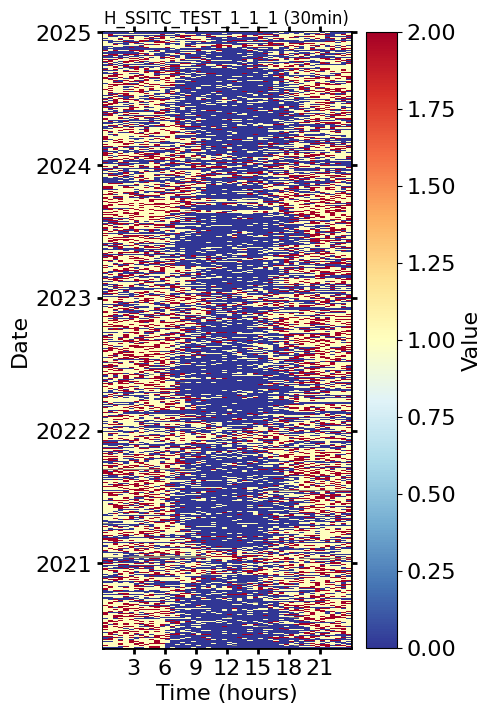

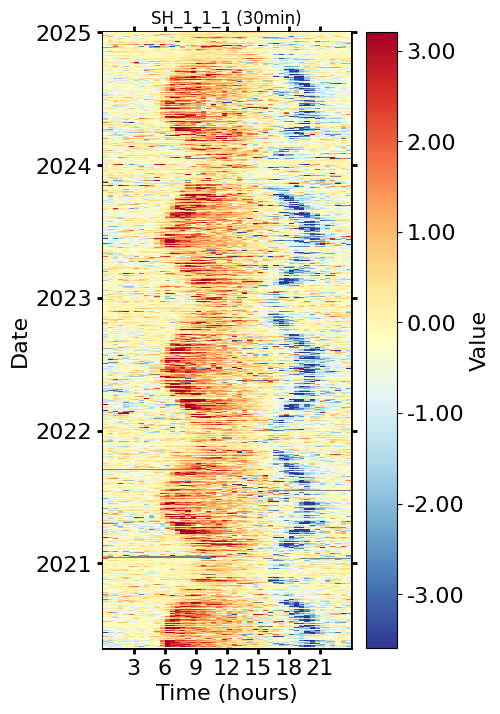

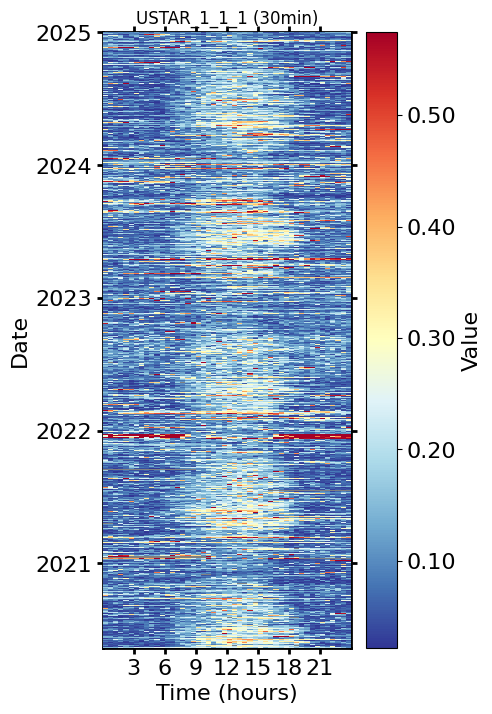

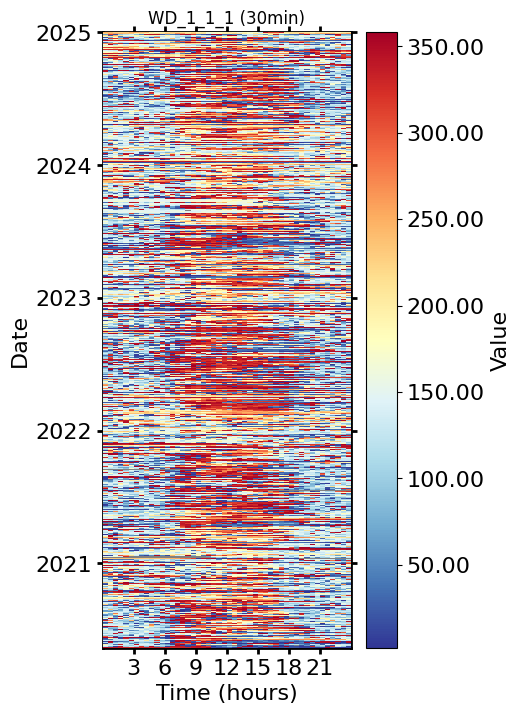

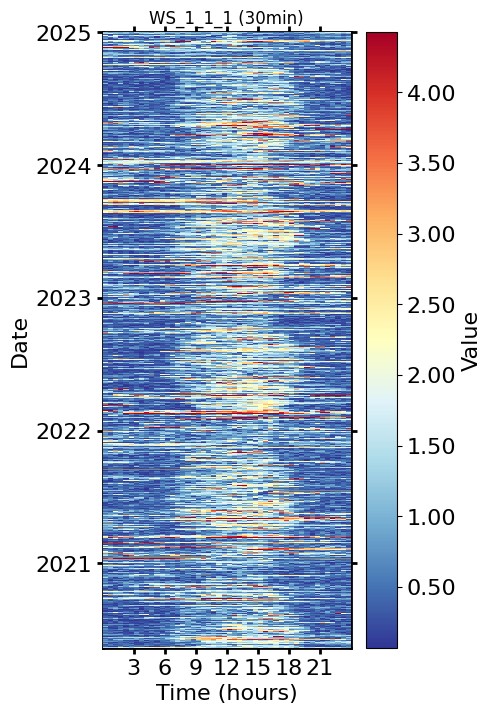

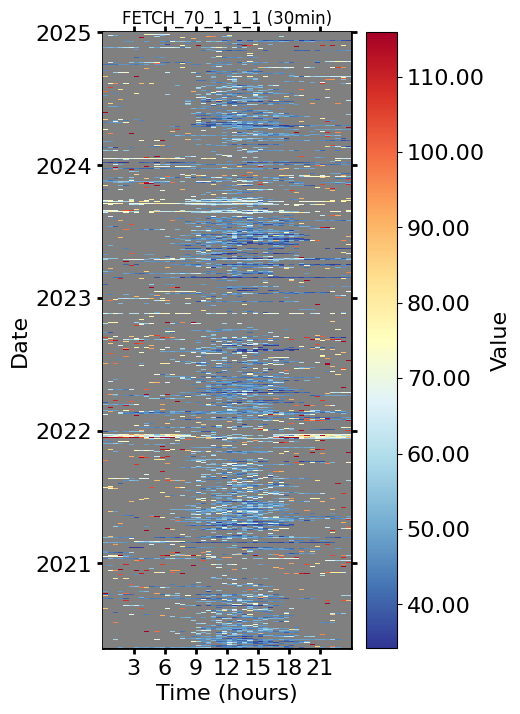

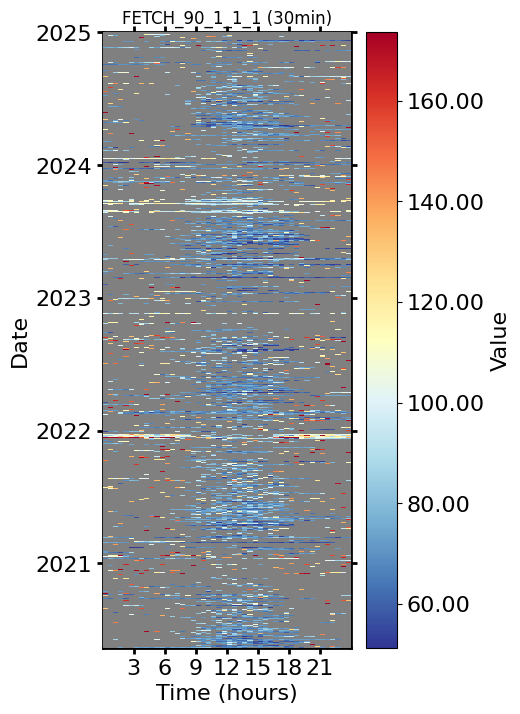

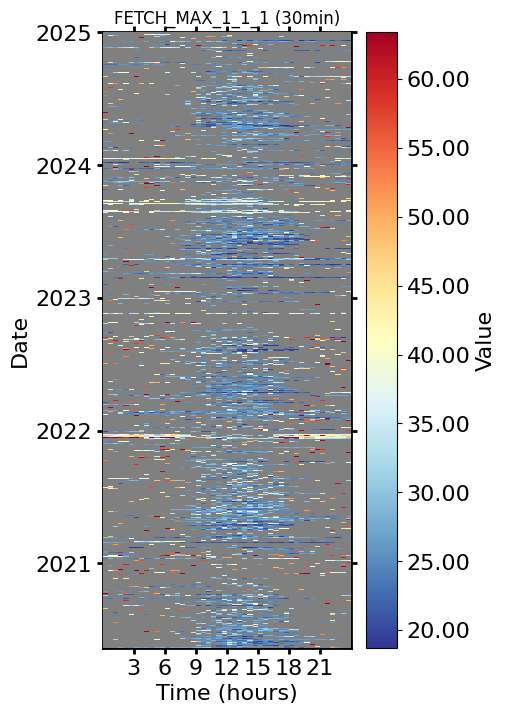

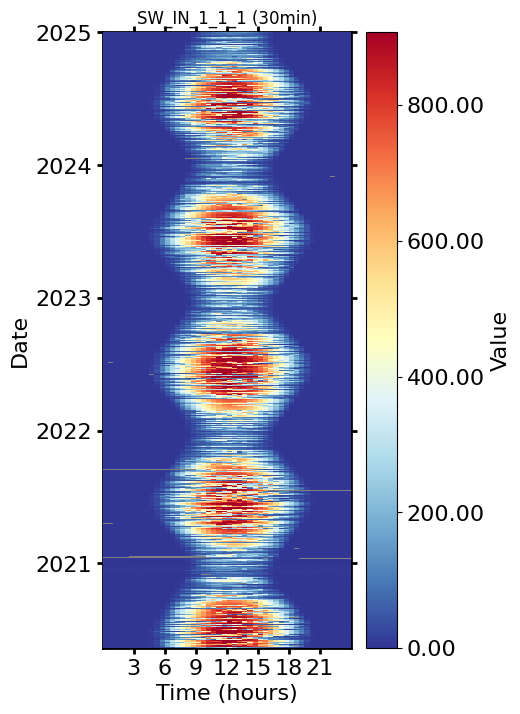

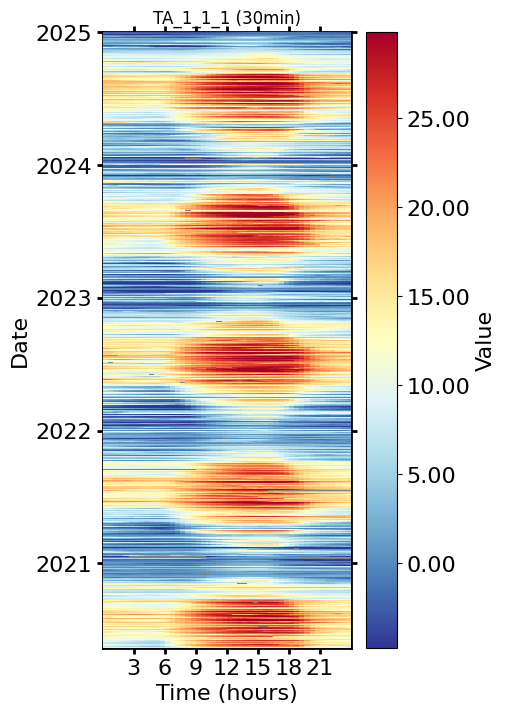

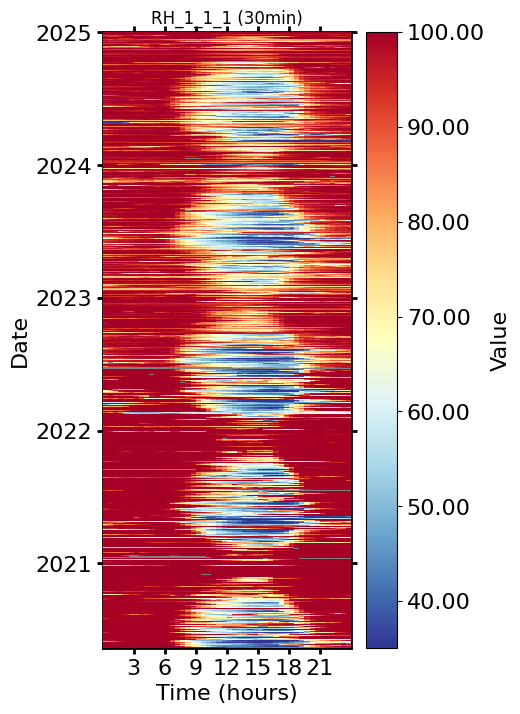

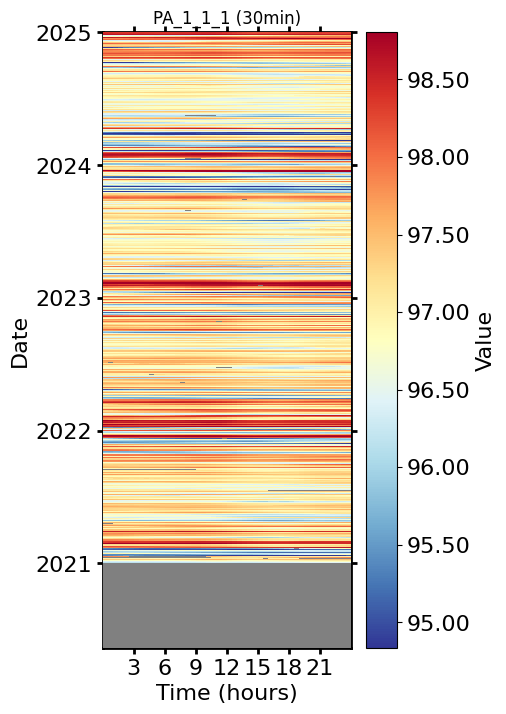

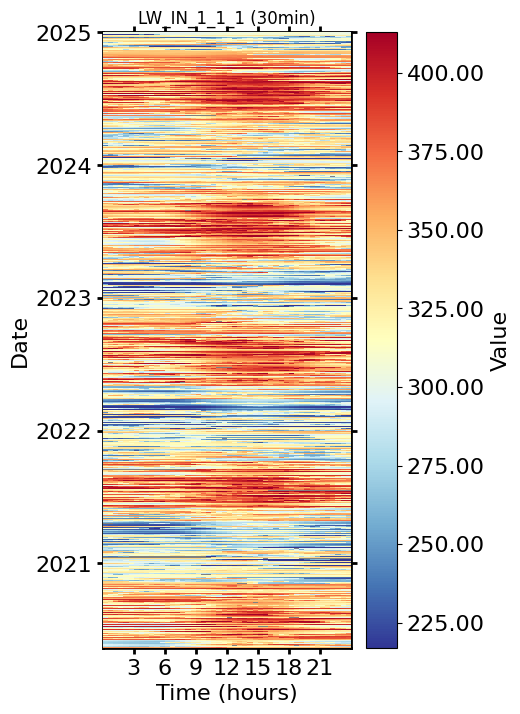

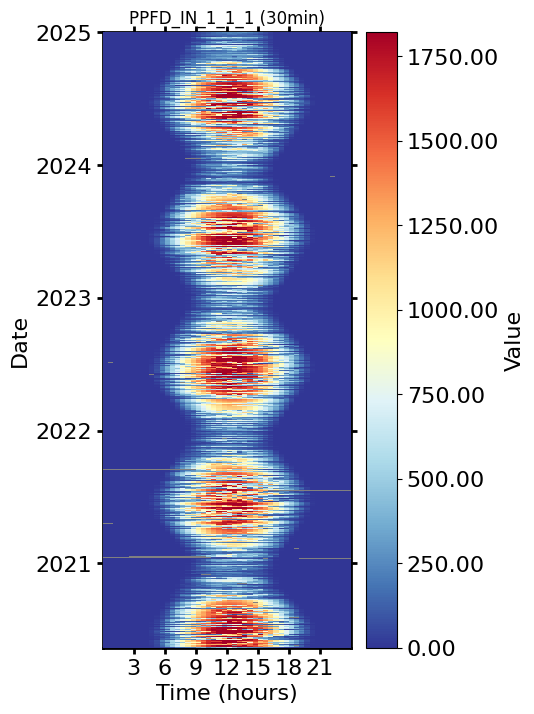

In [19]:
for col in data_fluxnet.columns:
    series = data_fluxnet[col].copy()
    series.replace(to_replace=-9999, value=np.nan, inplace=True)
    try:        
        fig = plt.figure(facecolor='white', figsize=(4, 8))
        gs = gridspec.GridSpec(1, 1)  # rows, cols
        ax = fig.add_subplot(gs[0, 0])
        vmin = series.quantile(.01)
        vmax = series.quantile(.99)
        HeatmapDateTime(ax=ax, series=series, vmin=vmin, vmax=vmax).plot()
        ax_fc.set_title(col, color='black')
        fig.show()        
    except TypeError:
        pass        

</br>

# **End of notebook**

In [20]:
dt_string = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"Finished {dt_string}")

Finished 2025-02-25 15:27:19
